In [1]:
%matplotlib inline
import pandas as pd
from plotnine import *

In [11]:
# Infected
# Susceptible
# Recovered

I = 0.001
S = 1 - I
R = 0
#D = 0
num_contacts = 15
prob_trans = 0.03
duration = 10

sim_length = 120

gamma = 1 / duration
alpha = 0.01
beta = num_contacts * prob_trans
#delta = 0.03

r_0 = beta / gamma

x = []
yS = []
yI = []
yR = []
#yD = []

for i in range(sim_length + 1):

    
    x.append(i)
    yS.append(S)
    yI.append(I)
    yR.append(R)
    
#    yD.append(D)
    
    S_old = S
    I_old = I
    R_old = R
#    D_old = D
#    num_cont_old = num_contacts

#    num_contacts = 0.98 * num_cont_old
    S += -beta * I_old * S_old
    I += beta * I_old * S_old - gamma * I# - delta * I
    R += gamma * I_old 
#    D += delta * I

In [12]:
S

0.008230582639515534

In [13]:
I

5.1446230223037976e-05

In [14]:
R

0.991717971130262

In [15]:
d = pd.DataFrame(list(zip(x, yS, yI, yR)), #, yD)), 
                 columns=["Time", "Susceptible", "Infected", "Recovered"])#, "Died"])

In [16]:
d

,Time,Susceptible,Infected,Recovered
0,0,0.999000,0.001000,0.000000
1,1,0.998550,0.001350,0.000100
2,2,0.997944,0.001821,0.000235
3,3,0.997126,0.002457,0.000417
4,4,0.996024,0.003313,0.000663
...,...,...,...,...
116,116,0.008232,0.000085,0.991683
117,117,0.008232,0.000077,0.991691
118,118,0.008231,0.000070,0.991699
119,119,0.008231,0.000063,0.991706


In [17]:
dmelt = d.melt(id_vars=["Time"],
               value_vars=["Susceptible", "Infected", "Recovered"],#, "Died"], 
               var_name="series", 
               value_name="percent")

In [18]:
dmelt

,Time,series,percent
0,0,Susceptible,0.999000
1,1,Susceptible,0.998550
2,2,Susceptible,0.997944
3,3,Susceptible,0.997126
4,4,Susceptible,0.996024
...,...,...,...
358,116,Recovered,0.991683
359,117,Recovered,0.991691
360,118,Recovered,0.991699
361,119,Recovered,0.991706


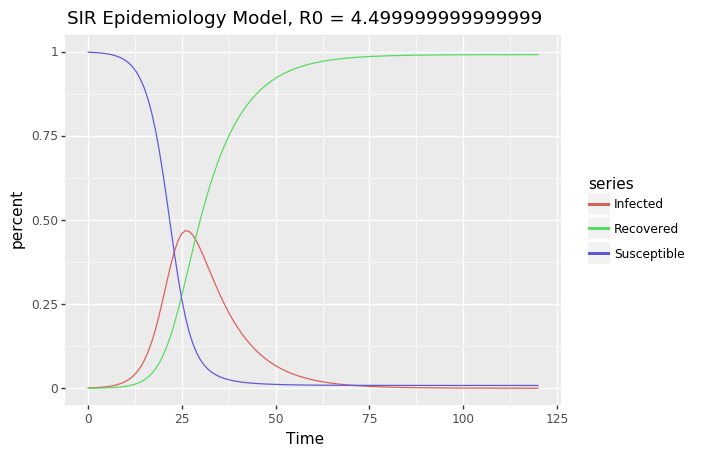

<ggplot: (7546256273)>

In [19]:
ggplot(dmelt, aes(x="Time", y="percent", color="series", group="series")) + \
geom_line() + \
labs(title="SIR Epidemiology Model, R0 = " + str(r_0))